# EFFECT OF PROMOTIONS ON SALES 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

### Importing both Store and Sales CSV Files

In [2]:
df_store = pd.read_csv('store.csv', low_memory= False)
df_train = pd.read_csv('train.csv', low_memory= False)

### Eyeballing both dataset to see what they are like

In [3]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Merging Both Datasets for Further Analysis

In [5]:
# With Both dataset having "Store" column connecting them
df = df_store.merge(df_train,on=["Store"])
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [6]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

### Eyeballing the Unique Values of Each Categorical Columns (Expressed Numerically) For Proper Mapping 

In [7]:
df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [8]:
df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [9]:
df['Open'].unique()

array([1, 0], dtype=int64)

In [10]:
df['Promo2'].unique()

array([0, 1], dtype=int64)

In [11]:
df['Open'].unique()

array([1, 0], dtype=int64)

In [12]:
df['Promo'].unique()

array([1, 0], dtype=int64)

In [13]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [14]:
df['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [15]:
# Mapping the Numerically represented categorical Columns
df['Assortment'] = df['Assortment'].replace(['a','b','c'],['Basic','Extra','Extended'])
df['Open'] = df['Open'].replace([1,0],['Yes','No'])
df['Promo2'] = df['Promo2'].replace([1,0],['Participating', 'Not Participating'])
df['Open'] = df['Open'].replace([1,0], ['Yes','No'])
df['Promo']= df['Promo'].replace([1,0],['Yes', 'No'])
df['StateHoliday']=	df['StateHoliday'].replace(['a','b','c','0'], ['Public Holiday','Easter Holiday', 'Christmas', 'None'])
df['SchoolHoliday']= df['SchoolHoliday'].replace([1,0], ['Yes','No'])


In [16]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,5,2015-07-31,5263,555,Yes,Yes,None,Yes
1,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,4,2015-07-30,5020,546,Yes,Yes,None,Yes
2,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,3,2015-07-29,4782,523,Yes,Yes,None,Yes
3,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,2,2015-07-28,5011,560,Yes,Yes,None,Yes
4,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,1,2015-07-27,6102,612,Yes,Yes,None,Yes


### Extraction of various time measures from the date column

In [17]:
df["DateTime"] = pd.to_datetime(df['Date'], utc = True)

In [18]:
df['Date'] = df.DateTime.dt.date
df['Month'] = df['DateTime'].dt.month
df['Mon_Year'] = df['DateTime'].dt.strftime('%Y-%m')
df['Year'] = df.DateTime.dt.year

In [19]:
df['Seasons'] = np.where(df['Month'].isin([6,7,8,9]),'Summer',
                np.where(df['Month'].isin([10,11]),'Fall',
                np.where(df['Month'].isin([12,1,2]),'Winter',
                np.where(df['Month'].isin([3,4,5]),'Spring',
                'nil'))))

In [20]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,DateTime,Month,Mon_Year,Year,Seasons
0,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,...,555,Yes,Yes,None,Yes,2015-07-31 00:00:00+00:00,7,2015-07,2015,Summer
1,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,...,546,Yes,Yes,None,Yes,2015-07-30 00:00:00+00:00,7,2015-07,2015,Summer
2,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,...,523,Yes,Yes,None,Yes,2015-07-29 00:00:00+00:00,7,2015-07,2015,Summer
3,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,...,560,Yes,Yes,None,Yes,2015-07-28 00:00:00+00:00,7,2015-07,2015,Summer
4,1,c,Basic,1270.0,9.0,2008.0,Not Participating,NaN,NaN,NaN,...,612,Yes,Yes,None,Yes,2015-07-27 00:00:00+00:00,7,2015-07,2015,Summer


In [21]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'DateTime', 'Month', 'Mon_Year', 'Year', 'Seasons'],
      dtype='object')

### Rearrangement of the Columns to accomodate the newly added columns (date measures)

In [22]:
df = df.loc[:,['Store', 'StoreType', 'Assortment', 'DateTime', 'Date', 'Year', 'Month', 'Mon_Year', 'DayOfWeek', 
                'Seasons', 'Open', 'Sales', 'Customers', 'Promo', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 
                'PromoInterval', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                'StateHoliday', 'SchoolHoliday']]
df.head()

,Store,StoreType,Assortment,DateTime,Date,Year,Month,Mon_Year,DayOfWeek,Seasons,...,Promo,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StateHoliday,SchoolHoliday
0,1,c,Basic,2015-07-31 00:00:00+00:00,2015-07-31,2015,7,2015-07,5,Summer,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
1,1,c,Basic,2015-07-30 00:00:00+00:00,2015-07-30,2015,7,2015-07,4,Summer,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
2,1,c,Basic,2015-07-29 00:00:00+00:00,2015-07-29,2015,7,2015-07,3,Summer,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
3,1,c,Basic,2015-07-28 00:00:00+00:00,2015-07-28,2015,7,2015-07,2,Summer,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
4,1,c,Basic,2015-07-27 00:00:00+00:00,2015-07-27,2015,7,2015-07,1,Summer,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes


In [23]:
df.describe()

,Store,Year,Month,DayOfWeek,Sales,Customers,Promo2SinceWeek,Promo2SinceYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,509178.000000,509178.000000,1.014567e+06,693861.000000,693861.000000
mean,5.584297e+02,2.013832e+03,5.846762e+00,3.998341e+00,5.773819e+03,6.331459e+02,23.269093,2011.752774,5.430086e+03,7.222866,2008.690228
std,3.219087e+02,7.773960e-01,3.326097e+00,1.997391e+00,3.849926e+03,4.644117e+02,14.095973,1.662870,7.715324e+03,3.211832,5.992644
min,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,2009.000000,2.000000e+01,1.000000,1900.000000
25%,2.800000e+02,2.013000e+03,3.000000e+00,2.000000e+00,3.727000e+03,4.050000e+02,13.000000,2011.000000,7.100000e+02,4.000000,2006.000000
50%,5.580000e+02,2.014000e+03,6.000000e+00,4.000000e+00,5.744000e+03,6.090000e+02,22.000000,2012.000000,2.330000e+03,8.000000,2010.000000
75%,8.380000e+02,2.014000e+03,8.000000e+00,6.000000e+00,7.856000e+03,8.370000e+02,37.000000,2013.000000,6.890000e+03,10.000000,2013.000000
max,1.115000e+03,2.015000e+03,1.200000e+01,7.000000e+00,4.155100e+04,7.388000e+03,50.000000,2015.000000,7.586000e+04,12.000000,2015.000000


### Dropping Datetime Column to prevent redundancy

In [24]:
df.drop(['DateTime'], axis = 'columns')

,Store,StoreType,Assortment,Date,Year,Month,Mon_Year,DayOfWeek,Seasons,Open,...,Promo,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StateHoliday,SchoolHoliday
0,1,c,Basic,2015-07-31,2015,7,2015-07,5,Summer,Yes,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
1,1,c,Basic,2015-07-30,2015,7,2015-07,4,Summer,Yes,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
2,1,c,Basic,2015-07-29,2015,7,2015-07,3,Summer,Yes,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
3,1,c,Basic,2015-07-28,2015,7,2015-07,2,Summer,Yes,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
4,1,c,Basic,2015-07-27,2015,7,2015-07,1,Summer,Yes,...,Yes,Not Participating,NaN,NaN,NaN,1270.0,9.0,2008.0,None,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,Extended,2013-01-05,2013,1,2013-01,6,Winter,Yes,...,No,Participating,22.0,2012.0,"Mar,Jun,Sept,Dec",5350.0,NaN,NaN,None,Yes
1017205,1115,d,Extended,2013-01-04,2013,1,2013-01,5,Winter,Yes,...,No,Participating,22.0,2012.0,"Mar,Jun,Sept,Dec",5350.0,NaN,NaN,None,Yes
1017206,1115,d,Extended,2013-01-03,2013,1,2013-01,4,Winter,Yes,...,No,Participating,22.0,2012.0,"Mar,Jun,Sept,Dec",5350.0,NaN,NaN,None,Yes
1017207,1115,d,Extended,2013-01-02,2013,1,2013-01,3,Winter,Yes,...,No,Participating,22.0,2012.0,"Mar,Jun,Sept,Dec",5350.0,NaN,NaN,None,Yes


## DATA ANALYSIS AND VISUALIZATION

### Top Ten Store By Sales


In [25]:
df_storesales_top = df.pivot_table(index = 'Store', values= 'Sales', 
                aggfunc=sum).sort_values('Sales', ascending=False).head(10)
df_storesales_top

,Sales
Store,
262,19516842
817,17057867
562,16927322
1114,16202585
251,14896870
513,14252406
788,14082141
733,14067158
383,13489879


<AxesSubplot:title={'center':'TOP TEN STORE BY SALES'}, xlabel='Store Number', ylabel='Total Sales'>

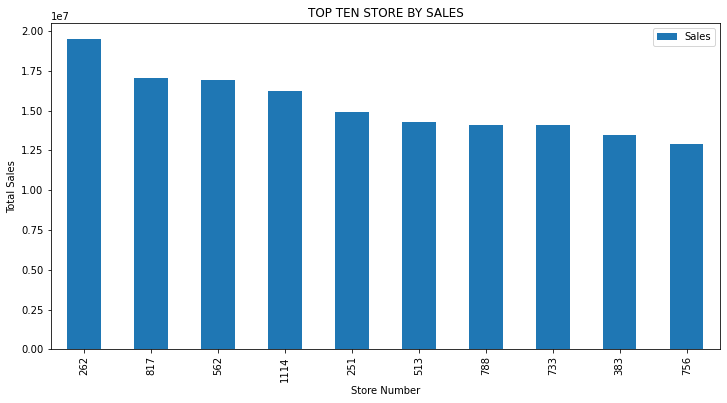

In [26]:
df_storesales_top.plot(y= 'Sales', 
                    kind = 'bar',
                    figsize=(12,6), 
                    xlabel = 'Store Number', 
                    ylabel = 'Total Sales', 
                    title= 'TOP TEN STORE BY SALES')

### Top Ten Store By Customer Patronage

<AxesSubplot:title={'center':'TOP TEN STORE BY CUSTOMER PATRONAGE'}, xlabel='Store Number', ylabel='Total Customer Patronage'>

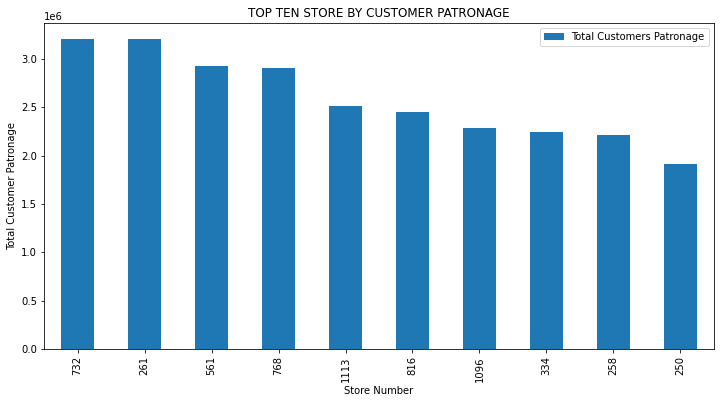

In [27]:
(df.groupby(['Store'])["Customers"].sum().reset_index(name = "Total Customers Patronage").sort_values
                        ('Total Customers Patronage', ascending=False).head(10)).plot(
                            y= 'Total Customers Patronage', 
                            kind = 'bar',
                            figsize=(12,6), 
                            xlabel = 'Store Number', 
                            ylabel = 'Total Customer Patronage', 
                            title= 'TOP TEN STORE BY CUSTOMER PATRONAGE')

### Total Monthly Sales Over The Period in Consideration

In [28]:
df = df.set_index(pd.to_datetime(df['Date']))
df = df.sort_index(ascending=False)

In [29]:
df_date_sales = df.groupby(["Mon_Year"])["Sales"].sum().reset_index(name = "Total_Sales")
df_date_sales

,Mon_Year,Total_Sales
0,2013-01,180132207
1,2013-02,171534275
2,2013-03,201180369
3,2013-04,183431432
4,2013-05,185411063
5,2013-06,180702351
6,2013-07,208843882
7,2013-08,198042727
8,2013-09,178053963
9,2013-10,187662330


<AxesSubplot:title={'center':'MONTHLY SALES'}, xlabel='Month', ylabel='Total Sales (Hundred Million Dollars)'>

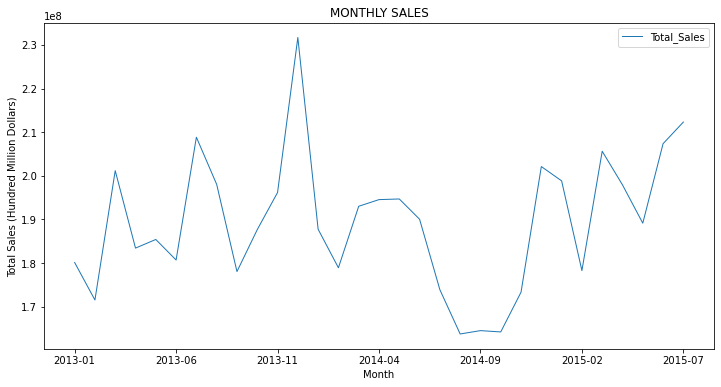

In [30]:
df_date_sales.plot(x = "Mon_Year",
                   y= "Total_Sales", 
                   kind='line', 
                   linewidth=1.0, 
                   figsize=(12, 6), 
                   title = "MONTHLY SALES",
                   xlabel = "Month",
                   ylabel = "Total Sales (Hundred Million Dollars)")

### Analyzing Total Sales Based on Assortment of Products Sold

In [31]:
df.pivot_table(index= 'Assortment', values=['Customers', 'Sales'], aggfunc=sum)


,Customers,Sales
Assortment,,
Basic,332766938,2945750070
Extended,294302292,2856484241
Extra,16972525,70946312


In [32]:
df_assortment = df.groupby(['Assortment'])['Sales'].sum().reset_index(name = "Total Sales")
df_assortment

,Assortment,Total Sales
0,Basic,2945750070
1,Extended,2856484241
2,Extra,70946312


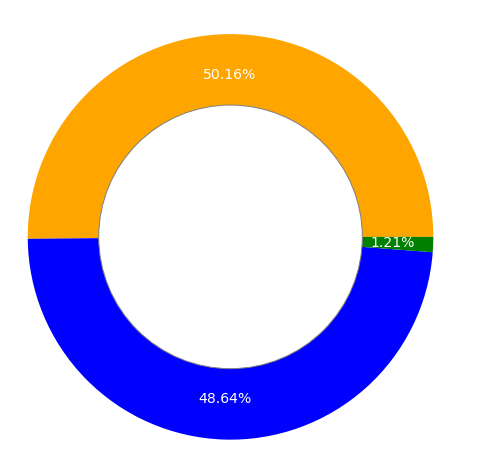

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
labels = df_assortment['Assortment']
sizes = df_assortment['Total Sales']
colors = ['orange', 'blue', 'green']
textprops = {"fontsize":14,'color':'white'}
plt.pie(sizes, labels=labels, colors=colors,
 autopct= '%.2f%%',
 pctdistance =0.8,
 shadow=False,
 textprops =textprops,
 wedgeprops={'linewidth': 3.0},)
 
centre_circle = plt.Circle((0,0),0.65,color= 'grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

### Analyzing Assortment of Product Sales Peculiar to Each Store Type

In [34]:
df.pivot_table(index= 'StoreType', columns='Assortment', values=['Sales'], aggfunc=sum)

Sales                          
Assortment         Basic      Extended       Extra
StoreType                                         
a           1.870105e+09  1.295230e+09         NaN
b           7.135776e+07  1.692732e+07  70946312.0
c           4.002604e+08  3.829610e+08         NaN
d           6.040268e+08  1.161366e+09         NaN

<AxesSubplot:title={'center':'STORE TYPE TOTAL SALES BASED ON ASSORTMENT OF PRODUCTS'}, xlabel='StoreType', ylabel='Total Sales (in Billion Dollars'>

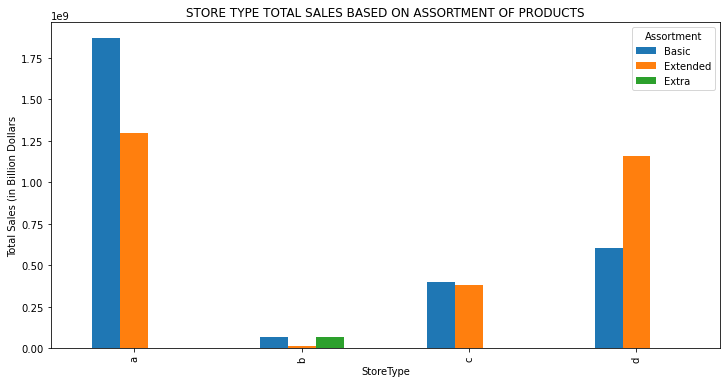

In [35]:
(df.pivot_table(index= 'StoreType', columns='Assortment', values=['Sales'], aggfunc=sum)).plot(
    kind = 'bar',
    y = 'Sales',
    figsize= (12,6),
    title= 'STORE TYPE TOTAL SALES BASED ON ASSORTMENT OF PRODUCTS',
    ylabel= 'Total Sales (in Billion Dollars'
)

### Analyzing Promotion Effects on Total Sales Over Time 

In [36]:
df.pivot_table(columns= 'Promo', values=[ 'Sales', 'Customers'], aggfunc=sum)

Promo,No,Yes
Customers,325777807,318263948
Sales,2771974337,3101206286


<AxesSubplot:>

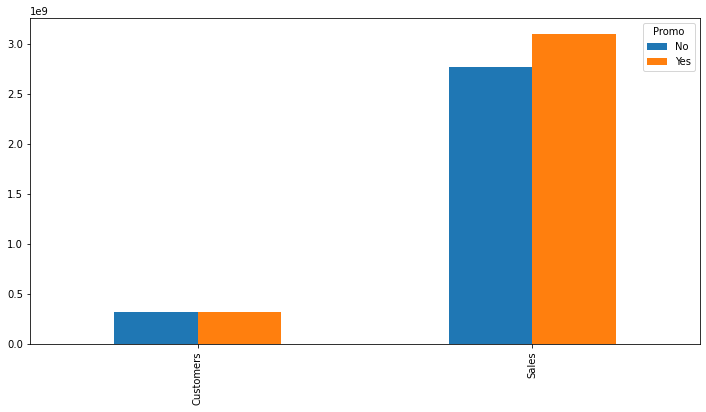

In [37]:
(df.pivot_table(columns= 'Promo', values=[ 'Sales', 'Customers'], aggfunc=sum)).plot(kind = 'bar', figsize=(12,6))

In [38]:
df_promo_sales = df.pivot_table(index= 'Mon_Year', columns= 'Promo', values=[ 'Sales'], aggfunc=sum)
df_promo_sales

Sales           
Promo            No        Yes
Mon_Year                      
2013-01    96969977   83162230
2013-02    86960640   84573635
2013-03    73428141  127752228
2013-04    81415390  102016042
2013-05    82434542  102976521
2013-06    97438010   83264341
2013-07    86858100  121985782
2013-08    93450340  104592387
2013-09    92776561   85277402
2013-10   103463895   84198435
2013-11   108494988   87675936
2013-12   113948599  117761962
2014-01   100853715   86899072
2014-02    89916176   89008501
2014-03    94307330   98712524
2014-04    86403813  108141164
2014-05    95952034   98741223
2014-06    86962550  103084501
2014-07    75651779   98240928
2014-08    82329775   81418700
2014-09    73226206   91289962
2014-10    77081955   87134443
2014-11    56090073  117237880
2014-12   104821354   97299238
2015-01    70839347  128004383
2015-02    92724345   85551113
2015-03    92651230  112980453
2015-04    89041336  108877550
2015-05    98789704   90354193
2015-06    92828111  114535262
2015-07    93864321  118458295

<AxesSubplot:title={'center':'PROMOTION EFFECT ON MONTHLY REVENUE'}, xlabel='Date', ylabel='Total Sales (Hundred Million Dollars)'>

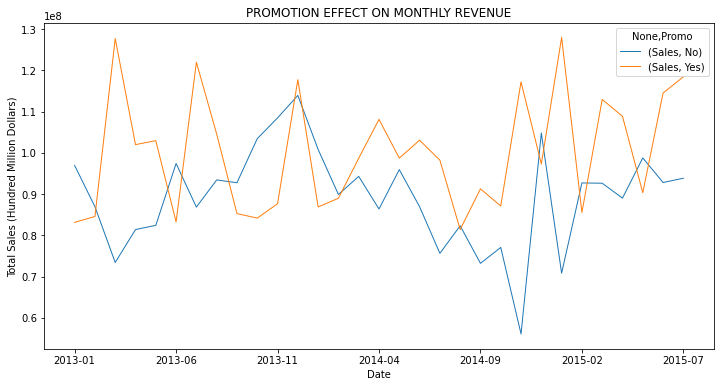

In [39]:
df_promo_sales.plot( 
    kind='line', 
    linewidth=1.0, 
    figsize=(12, 6), 
    title = "PROMOTION EFFECT ON MONTHLY REVENUE",
    xlabel = "Date",
    ylabel = "Total Sales (Hundred Million Dollars)"   
)

### Analyzing Promotion Effects on Customer Patronage And Sales on Weekdays


In [40]:
df_Weekday_Trans = df.pivot_table(index= 'DayOfWeek', columns= 'Promo', values=[ 'Sales', 'Customers'], aggfunc=sum)
df_Weekday_Trans

Customers                    Sales             
Promo              No         Yes           No          Yes
DayOfWeek                                                  
1          44802174.0  72872838.0  375323829.0  754879183.0
2          45956689.0  64891374.0  382090703.0  638321227.0
3          44172694.0  60944948.0  368921884.0  586040979.0
4          41683842.0  60049096.0  347985910.0  563191799.0
5          48879128.0  59505692.0  421782843.0  558773098.0
6          95103854.0         NaN  846317735.0          NaN
7           5179426.0         NaN   29551433.0          NaN

<AxesSubplot:title={'center':'EFFECT OF PROMOTION ON CUSTOMER PATRONAGE'}, xlabel='Day Of Week', ylabel='Customer Patronage(Ten Millions)'>

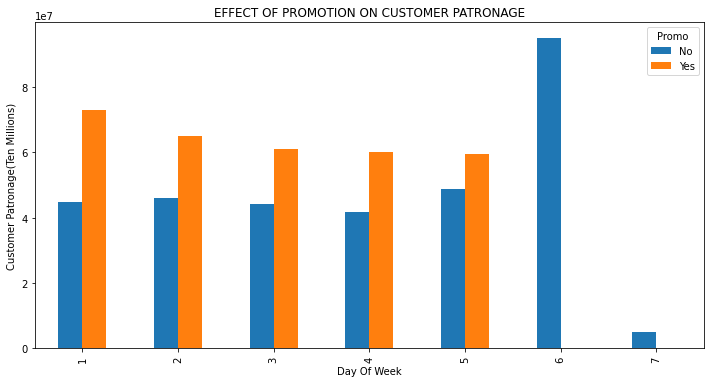

In [41]:
df_Weekday_Trans.plot(y = 'Customers',
                    kind = 'bar',
                    figsize=(12,6), 
                    xlabel = 'Day Of Week', 
                    ylabel = 'Customer Patronage(Ten Millions)', 
                    title= 'EFFECT OF PROMOTION ON CUSTOMER PATRONAGE')

<AxesSubplot:title={'center':'EFFECT OF PROMOTION ON DAILY SALES'}, xlabel='Day Of Week', ylabel='Total Sales(Ten Millions)'>

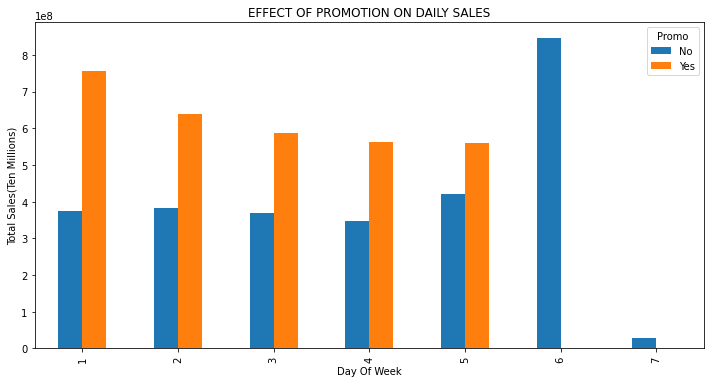

In [42]:
df_Weekday_Trans.plot(y = 'Sales',
                    kind = 'bar',
                    figsize=(12,6), 
                    xlabel = 'Day Of Week', 
                    ylabel = 'Total Sales(Ten Millions)', 
                    title= 'EFFECT OF PROMOTION ON DAILY SALES')

### Promotion Effect on Sales and Patronage Per Seasons

In [43]:
df_SeasonPromo = df.pivot_table(index = 'Seasons', columns= 'Promo', values= 'Sales', aggfunc=('sum', 'count')).rename(
    columns={'sum':'Total_Sales','count' : 'Total_Patronage'})
df_SeasonPromo

Total_Patronage         Total_Sales            
Promo                No     Yes          No         Yes
Seasons                                                
Fall              76570   48480   345130911   376246694
Spring           185090  122650   794423520   950551898
Summer           199540  123975   875385753  1002147560
Winter           167929   92975   757034153   772260134

<AxesSubplot:title={'center':'EFFECT OF PROMO ON PATRONAGE FOR EACH SEASON'}, xlabel='Seasons', ylabel='Total Patronage'>

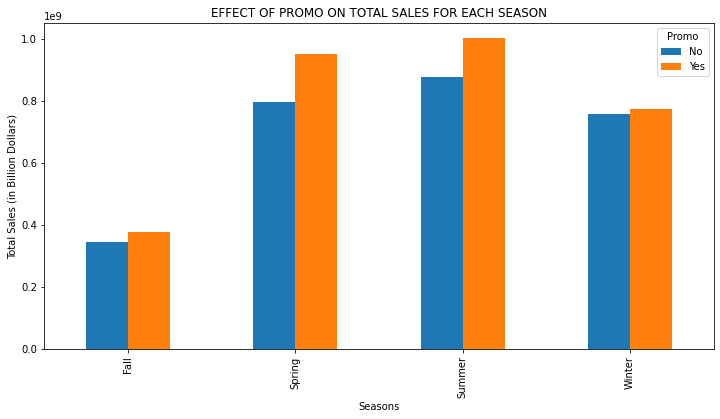

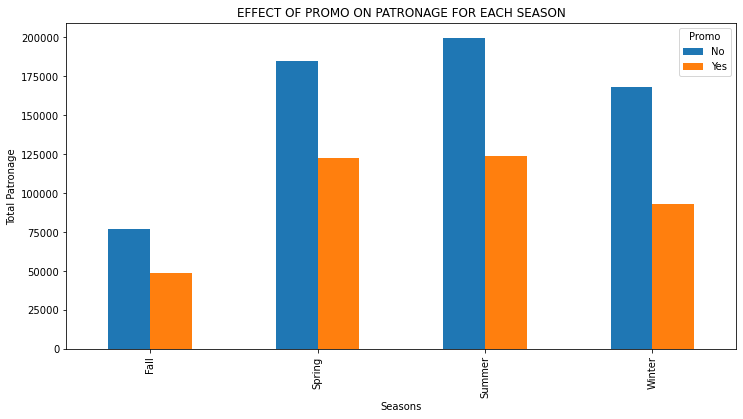

In [44]:
df_SeasonPromo.plot(kind= 'bar',
                    y= 'Total_Sales',
                    figsize= (12,6),
                    title= 'EFFECT OF PROMO ON TOTAL SALES FOR EACH SEASON',
                    ylabel= 'Total Sales (in Billion Dollars)')

df_SeasonPromo.plot(kind= 'bar',
                    y= 'Total_Patronage',
                    figsize= (12,6),
                    title= 'EFFECT OF PROMO ON PATRONAGE FOR EACH SEASON',
                    ylabel= 'Total Patronage')

# CONCLUSIONS

1.	Store 262 and 732 turned in the most revenue and customer patronage, respectively, of all stores under study,
2.	December 2013 realized the most revenue for the Month in consideration,
3.	Not Surprisingly, the "Basic" Assortment of Goods Experienced more patronage and, in turn, contributed more to the revenue of Rossman stores in total,
4.	Store Type "b" had the highest revenue for all store types. Also, it is the only one that offers "Extra" Assortment Goods Sales to customers of all the five Store types,
5.	Even though there seems to be not much difference in the number of patronages where there is a promo offer and when there is not, consumers seem to spend more when there is a PROMO than when there is not,
6.	Except for Saturday and Sunday (With no records of Promo on those days), Total Revenue and Patronage increase for days when there is PROMO than when there is not.
7.	Just Like the Explanation in 5, lower patronage was experienced during the PROMO period across all seasons in comparison to when there was NON-PROMO for the same period. But Contrarily, More Sales were recorded for the Promo Period than the NON-PROMO Period, Hence Customers tend to spend more during the PROMO than when there is NON-PROMO.

